In [ ]:
!pip install simpleai
from simpleai.search import SearchProblem
from simpleai.search.local import hill_climbing, simulated_annealing
import time

import numpy as np
import math
from matplotlib import pyplot as plt
crater_map = np.load('crater_map.npy')
nr, nc = crater_map.shape

In [ ]:
p0 = (9400, 1400)

max_dif_h = 2.0
INIT_STATE = (nr-round(p0[0]/10.0174), round(p0[1]/10.0174))
print(INIT_STATE)

(139, 140)


In [ ]:
class MarsRoverProblem(SearchProblem):

    def actions(self, state):
        h0 = crater_map[state[0],state[1]]
        list_actions = []
        for j in [-1,0,1]:
          for i in [-1,0,1]:
            if not (i == 0 and j == 0):
              h = crater_map[state[0]+i,state[1]+j]
              if (h0 - h) < max_dif_h and h!=-1.0:
                list_actions.append([state[0]+i, state[1]+j])
        return list_actions

    def result(self, state, action):
        return tuple([action[0], action[1]])

    def value(self, state):
        return -crater_map[state[0],state[1]]

In [ ]:
my_problem = MarsRoverProblem(initial_state=INIT_STATE)
t1 = time.time()
#result = hill_climbing(my_problem)
result = simulated_annealing(my_problem)
t2 = time.time()
print("Tiempo de procesamiento: ", t2-t1)

Tiempo de procesamiento:  0.0003387928009033203


In [ ]:
result.path()

[([138, 139], (138, 139))]

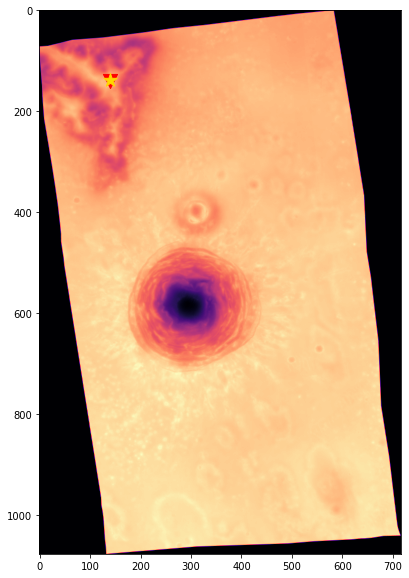

In [ ]:
# Convertimos a un arreglo de coordenadas X y Y.
rows = []
cols = []
for state in result.path():
    rows.append(state[1][0])
    cols.append(state[1][1])
fig = plt.figure(figsize=(10,10))
plt.imshow(crater_map, cmap='magma')
plt.scatter([INIT_STATE[1]], [INIT_STATE[0]], c='red', marker='v', s=200)
plt.scatter(cols, rows, c='gold', marker='*', s=200)
plt.show()